In [ ]:
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
from scipy import stats  # Import SciPy for statistical analysis
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for feature scaling
from sklearn.decomposition import PCA  # Import PCA for feature selection
from sklearn.cluster import KMeans, DBSCAN  # Import clustering algorithms
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score  # Import evaluation metrics
from scipy.stats import ttest_ind  # Import t-test for statistical analysis
from imblearn.over_sampling import SMOTE  # Import SMOTE for handling imbalanced data
import geopandas as gpd  # Import GeoPandas for spatial data
import folium  # Import Folium for interactive maps

In [3]:
# Load the averaged weather data with latitude and longitude
data_path = 'weather_data/averaged_weather_data_with_lat_lon.csv'
weather_data = pd.read_csv(data_path)

# Display the first few rows of the dataframe
weather_data.head()

,District,lat,lon,T2M,WS2M,PRECTOTCORR,RH2M,ALLSKY_SFC_SW_DWN,T2M_MIN,T2M_MAX,PS
0,MORBI,22.834967,70.903505,26.899521,3.167401,2.209720,57.716163,19.064555,21.044207,33.880739,100.530205
1,AHMAD>B>D,22.756916,72.243635,27.236703,2.357148,2.320814,53.662647,18.899767,20.910198,34.392620,100.300739
2,>NAND,22.426788,72.750860,27.221881,2.466423,2.555246,57.527373,18.899767,21.323543,33.785205,100.643782
3,DEVBHUMI DW>RKA,22.123915,69.460359,26.307209,3.604460,2.858263,69.092483,19.572715,22.572996,31.192695,100.628824
4,J>MNAGAR,22.284992,70.195152,26.447278,3.635609,2.589193,66.311778,19.064555,22.465294,31.408707,100.560260


In [4]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   District           736 non-null    object 
 1   lat                736 non-null    float64
 2   lon                736 non-null    float64
 3   T2M                736 non-null    float64
 4   WS2M               736 non-null    float64
 5   PRECTOTCORR        736 non-null    float64
 6   RH2M               736 non-null    float64
 7   ALLSKY_SFC_SW_DWN  736 non-null    float64
 8   T2M_MIN            736 non-null    float64
 9   T2M_MAX            736 non-null    float64
 10  PS                 736 non-null    float64
dtypes: float64(10), object(1)
memory usage: 63.4+ KB


In [5]:
# Summary statistics of the dataframe
weather_data.describe()

,lat,lon,T2M,WS2M,PRECTOTCORR,RH2M,ALLSKY_SFC_SW_DWN,T2M_MIN,T2M_MAX,PS
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,23.312534,81.285359,23.931880,1.854248,3.808877,65.254989,17.265557,18.947445,29.853627,95.591284
std,5.694111,6.527623,4.724684,0.735926,1.694113,9.502839,1.344210,4.686366,4.973627,6.694373
min,7.515421,69.460359,-7.484897,0.116279,1.039015,39.737018,12.243051,-12.459569,-2.458529,56.191683
25%,20.417171,76.459955,24.155330,1.597770,2.628153,57.760034,16.469567,18.921505,29.644562,95.223283
50%,24.410540,79.335063,25.199904,1.888769,3.453051,64.819699,17.394200,19.885657,31.294419,97.591272
75%,26.972000,85.531074,26.010062,2.252002,4.246929,73.702782,18.194622,20.595489,32.400029,99.203729
max,35.043894,96.856247,28.359658,4.695253,11.459590,86.403748,20.189357,27.991026,34.668078,100.962120


In [ ]:
# Verify that there are no more null values
weather_data.isnull().sum()


District             0
lat                  0
lon                  0
T2M                  0
WS2M                 0
PRECTOTCORR          0
RH2M                 0
ALLSKY_SFC_SW_DWN    0
T2M_MIN              0
T2M_MAX              0
PS                   0
dtype: int64

In [10]:
weather_data['District'] = weather_data['District'].str.replace('>', 'A').str.replace('@', 'A').str.replace('|', 'A')
weather_data.head()

,District,lat,lon,T2M,WS2M,PRECTOTCORR,RH2M,ALLSKY_SFC_SW_DWN,T2M_MIN,T2M_MAX,PS
0,MORBI,22.834967,70.903505,26.899521,3.167401,2.209720,57.716163,19.064555,21.044207,33.880739,100.530205
1,AHMADABAD,22.756916,72.243635,27.236703,2.357148,2.320814,53.662647,18.899767,20.910198,34.392620,100.300739
2,ANAND,22.426788,72.750860,27.221881,2.466423,2.555246,57.527373,18.899767,21.323543,33.785205,100.643782
3,DEVBHUMI DWARKA,22.123915,69.460359,26.307209,3.604460,2.858263,69.092483,19.572715,22.572996,31.192695,100.628824
4,JAMNAGAR,22.284992,70.195152,26.447278,3.635609,2.589193,66.311778,19.064555,22.465294,31.408707,100.560260


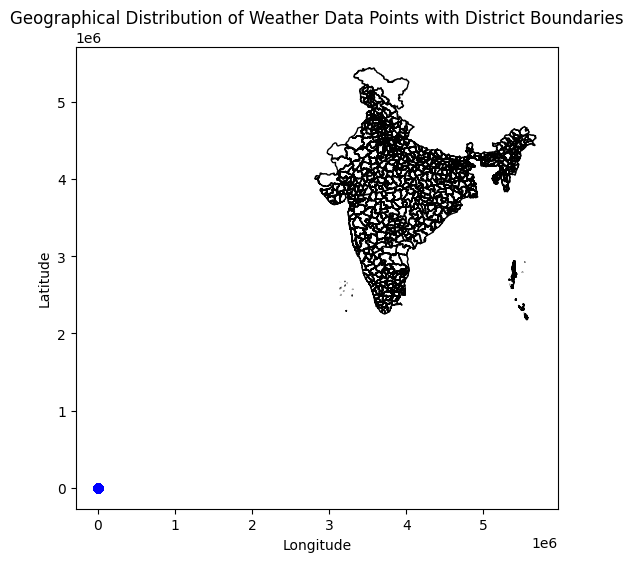

In [22]:
# Plot the geographical distribution of the data points
plt.figure(figsize=(10, 6))
plt.scatter(weather_data['lon'], weather_data['lat'], c='blue', marker='o', alpha=0.5)
plt.title('Geographical Distribution of Weather Data Points')

# Load the shapefile for district boundaries
districts_shapefile = 'shape_file_folder/DISTRICT_BOUNDARY.shp'
districts = gpd.read_file(districts_shapefile)

# Plot the district boundaries
districts.plot(ax=plt.gca(), edgecolor='black', facecolor='none')

# Plot the geographical distribution of the data points
plt.scatter(weather_data['lon'], weather_data['lat'], c='blue', marker='o', alpha=0.5)
plt.title('Geographical Distribution of Weather Data Points with District Boundaries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

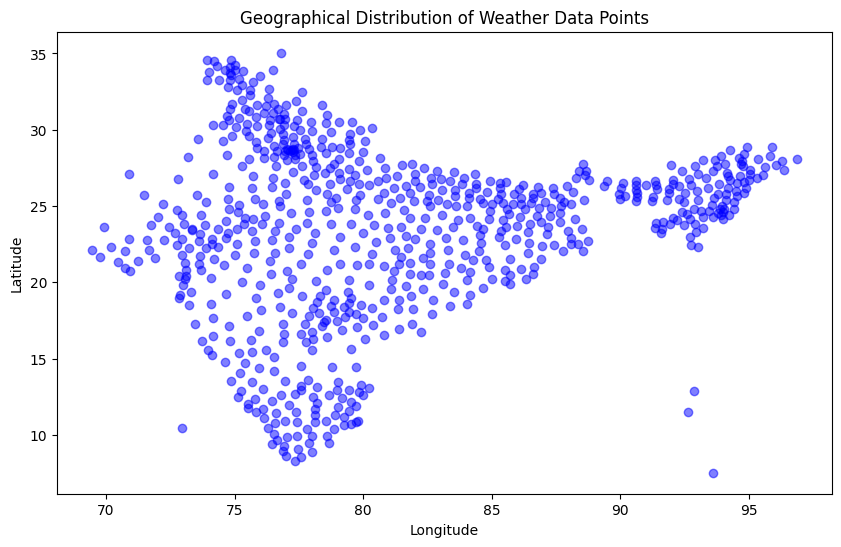

In [15]:
# Plot the geographical distribution of the data points
plt.figure(figsize=(10, 6))
plt.scatter(weather_data['lon'], weather_data['lat'], c='blue', marker='o', alpha=0.5)
plt.title('Geographical Distribution of Weather Data Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# Create a map centered around the average latitude and longitude
m = folium.Map(location=[weather_data['lat'].mean(), weather_data['lon'].mean()], zoom_start=5)

# Add points to the map
for idx, row in weather_data.iterrows():
    folium.CircleMarker([row['lat'], row['lon']],
                        radius=5,
                        color='blue',
                        fill=True,
                        fill_color='blue',
                        fill_opacity=0.6).add_to(m)

# Display the map
m

In [23]:
# Outlier Detection using Z-Score
from scipy import stats

# Calculate Z-Scores
z_scores = np.abs(stats.zscore(weather_data.select_dtypes(include=[np.number])))

# Set a threshold for Z-Scores
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

# Remove outliers
weather_data_cleaned = weather_data[(z_scores < threshold).all(axis=1)]

# Display the cleaned data
weather_data_cleaned.head()

,District,lat,lon,T2M,WS2M,PRECTOTCORR,RH2M,ALLSKY_SFC_SW_DWN,T2M_MIN,T2M_MAX,PS
0,MORBI,22.834967,70.903505,26.899521,3.167401,2.209720,57.716163,19.064555,21.044207,33.880739,100.530205
1,AHMADABAD,22.756916,72.243635,27.236703,2.357148,2.320814,53.662647,18.899767,20.910198,34.392620,100.300739
2,ANAND,22.426788,72.750860,27.221881,2.466423,2.555246,57.527373,18.899767,21.323543,33.785205,100.643782
3,DEVBHUMI DWARKA,22.123915,69.460359,26.307209,3.604460,2.858263,69.092483,19.572715,22.572996,31.192695,100.628824
4,JAMNAGAR,22.284992,70.195152,26.447278,3.635609,2.589193,66.311778,19.064555,22.465294,31.408707,100.560260


## **2. Feature Extraction**


In [24]:
#Log Transformation: Apply log transformation to reduce skewness.
weather_data_cleaned['log_T2M'] = np.log(weather_data_cleaned['T2M'] + 1)
weather_data_cleaned['log_WS2M'] = np.log(weather_data_cleaned['WS2M'] + 1)

/tmp/ipykernel_92500/709371041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_cleaned['log_T2M'] = np.log(weather_data_cleaned['T2M'] + 1)
/tmp/ipykernel_92500/709371041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_cleaned['log_WS2M'] = np.log(weather_data_cleaned['WS2M'] + 1)


In [26]:
# Create derived features (e.g., temperature range)
weather_data_cleaned['temp_range'] = weather_data_cleaned['T2M_MAX'] - weather_data_cleaned['T2M_MIN']

# Display the data with new features
weather_data_cleaned.head()

/tmp/ipykernel_92500/1604896703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_cleaned['temp_range'] = weather_data_cleaned['T2M_MAX'] - weather_data_cleaned['T2M_MIN']


,District,lat,lon,T2M,WS2M,PRECTOTCORR,RH2M,ALLSKY_SFC_SW_DWN,T2M_MIN,T2M_MAX,PS,log_T2M,log_WS2M,temp_range
0,MORBI,22.834967,70.903505,26.899521,3.167401,2.209720,57.716163,19.064555,21.044207,33.880739,100.530205,3.328610,1.427293,12.836532
1,AHMADABAD,22.756916,72.243635,27.236703,2.357148,2.320814,53.662647,18.899767,20.910198,34.392620,100.300739,3.340623,1.211092,13.482421
2,ANAND,22.426788,72.750860,27.221881,2.466423,2.555246,57.527373,18.899767,21.323543,33.785205,100.643782,3.340098,1.243123,12.461662
3,DEVBHUMI DWARKA,22.123915,69.460359,26.307209,3.604460,2.858263,69.092483,19.572715,22.572996,31.192695,100.628824,3.307151,1.527025,8.619699
4,JAMNAGAR,22.284992,70.195152,26.447278,3.635609,2.589193,66.311778,19.064555,22.465294,31.408707,100.560260,3.312267,1.533768,8.943413


In [29]:
# Select features for PCA
features = weather_data_cleaned[['log_T2M', 'log_WS2M', 'PRECTOTCORR', 'RH2M', 'ALLSKY_SFC_SW_DWN', 'T2M_MIN', 'T2M_MAX', 'PS', 'temp_range']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=7)
pca_features = pca.fit_transform(scaled_features)

# Create a new DataFrame with PCA features
pca_weather_data = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_weather_data['lat'] = weather_data_cleaned['lat']
pca_weather_data['lon'] = weather_data_cleaned['lon']
pca_weather_data['District'] = weather_data_cleaned['District']

# Display the PCA features
pca_weather_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,lat,lon,District
0,-2.782097,-0.905778,0.620218,0.058691,0.142034,-0.208552,0.586851,22.834967,70.903505,MORBI
1,-2.742301,-1.161379,-0.086230,0.543307,0.294373,0.025975,0.347459,22.756916,72.243635,AHMADABAD
2,-2.519069,-0.561634,0.284306,0.390276,0.148595,0.104006,0.429455,22.426788,72.750860,ANAND
3,-1.868220,1.005078,2.423285,-0.318696,-0.374138,0.470605,0.724793,22.123915,69.460359,DEVBHUMI DWARKA
4,-1.948175,0.759476,2.017044,-0.610842,-0.422942,0.491755,0.533511,22.284992,70.195152,JAMNAGAR


## **Clustering Algorithms**

- K-Means Clustering
- DBSCAN


In [30]:
# Initialize K-Means with a chosen number of clusters
kmeans = KMeans(n_clusters=7, random_state=42)

# Fit the model to the PCA features
kmeans.fit(pca_features)

# Add the cluster labels to the DataFrame
pca_weather_data['kmeans_cluster'] = kmeans.labels_

# Display the first few rows with cluster labels
pca_weather_data.head()

/home/biren/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,lat,lon,District,kmeans_cluster
0,-2.782097,-0.905778,0.620218,0.058691,0.142034,-0.208552,0.586851,22.834967,70.903505,MORBI,4
1,-2.742301,-1.161379,-0.086230,0.543307,0.294373,0.025975,0.347459,22.756916,72.243635,AHMADABAD,4
2,-2.519069,-0.561634,0.284306,0.390276,0.148595,0.104006,0.429455,22.426788,72.750860,ANAND,4
3,-1.868220,1.005078,2.423285,-0.318696,-0.374138,0.470605,0.724793,22.123915,69.460359,DEVBHUMI DWARKA,2
4,-1.948175,0.759476,2.017044,-0.610842,-0.422942,0.491755,0.533511,22.284992,70.195152,JAMNAGAR,2


In [31]:
# Initialize DBSCAN with chosen parameters
dbscan = DBSCAN(eps=0.5, min_samples=7)

# Fit the model to the PCA features
dbscan.fit(pca_features)

# Add the cluster labels to the DataFrame
pca_weather_data['dbscan_cluster'] = dbscan.labels_

# Display the first few rows with cluster labels
pca_weather_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,lat,lon,District,kmeans_cluster,dbscan_cluster
0,-2.782097,-0.905778,0.620218,0.058691,0.142034,-0.208552,0.586851,22.834967,70.903505,MORBI,4,-1
1,-2.742301,-1.161379,-0.086230,0.543307,0.294373,0.025975,0.347459,22.756916,72.243635,AHMADABAD,4,0
2,-2.519069,-0.561634,0.284306,0.390276,0.148595,0.104006,0.429455,22.426788,72.750860,ANAND,4,-1
3,-1.868220,1.005078,2.423285,-0.318696,-0.374138,0.470605,0.724793,22.123915,69.460359,DEVBHUMI DWARKA,2,-1
4,-1.948175,0.759476,2.017044,-0.610842,-0.422942,0.491755,0.533511,22.284992,70.195152,JAMNAGAR,2,-1


## **Clustering Algorithm Comparison**

In [32]:
# Calculate the silhouette score for K-Means clustering
kmeans_silhouette_score = silhouette_score(pca_features, pca_weather_data['kmeans_cluster'])
print(f'K-Means Silhouette Score: {kmeans_silhouette_score}')

# Calculate the silhouette score for DBSCAN clustering
dbscan_silhouette_score = silhouette_score(pca_features, pca_weather_data['dbscan_cluster'])
print(f'DBSCAN Silhouette Score: {dbscan_silhouette_score}')

# Calculate ARI for K-Means clustering
kmeans_ari = adjusted_rand_score(pca_weather_data['kmeans_cluster'], pca_weather_data['dbscan_cluster'])
print(f'K-Means ARI: {kmeans_ari}')

# Calculate NMI for K-Means clustering
kmeans_nmi = normalized_mutual_info_score(pca_weather_data['kmeans_cluster'], pca_weather_data['dbscan_cluster'])
print(f'K-Means NMI: {kmeans_nmi}')

K-Means Silhouette Score: 0.30027707454425573
DBSCAN Silhouette Score: -0.15918334709306642
K-Means ARI: 0.057893091174861105
K-Means NMI: 0.2982840572215099


In [36]:
# Summary statistics of the cleaned data
weather_data_cleaned.describe()

# Perform statistical tests (e.g., t-test between clusters)
# Example: T-test between two clusters for temperature
aligned_weather_data_cleaned = weather_data_cleaned.set_index(pca_weather_data.index)
cluster_0 = aligned_weather_data_cleaned[pca_weather_data['kmeans_cluster'] == 0]['log_T2M']
cluster_1 = aligned_weather_data_cleaned[pca_weather_data['kmeans_cluster'] == 1]['log_T2M']
t_stat, p_value = ttest_ind(cluster_0, cluster_1)
print(f'T-test between Cluster 0 and Cluster 1 for Temperature: t-stat={t_stat}, p-value={p_value}')

T-test between Cluster 0 and Cluster 1 for Temperature: t-stat=28.24872253209299, p-value=6.622356577718569e-46


In [37]:
# Check the distribution of clusters
cluster_counts = pca_weather_data['kmeans_cluster'].value_counts()
print(cluster_counts)

# If imbalanced, consider techniques like SMOTE (Synthetic Minority Over-sampling Technique)
# Apply SMOTE to balance the clusters
smote = SMOTE(random_state=42)
balanced_features, balanced_clusters = smote.fit_resample(pca_features, pca_weather_data['kmeans_cluster'])

# Display the balanced cluster distribution
balanced_cluster_counts = pd.Series(balanced_clusters).value_counts()
print(balanced_cluster_counts)

kmeans_cluster
4    221
5    179
2    114
6     70
1     50
0     40
3     15
Name: count, dtype: int64
kmeans_cluster
4    221
2    221
0    221
1    221
5    221
3    221
6    221
Name: count, dtype: int64


# Bar-plot of weather district clusters

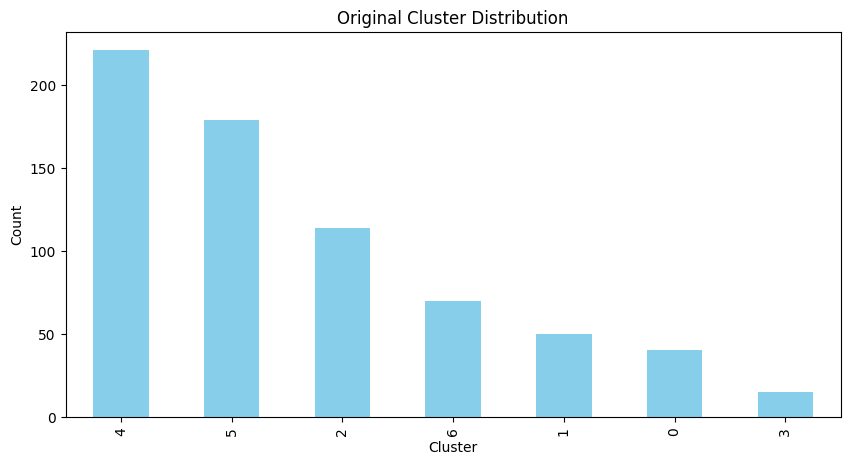

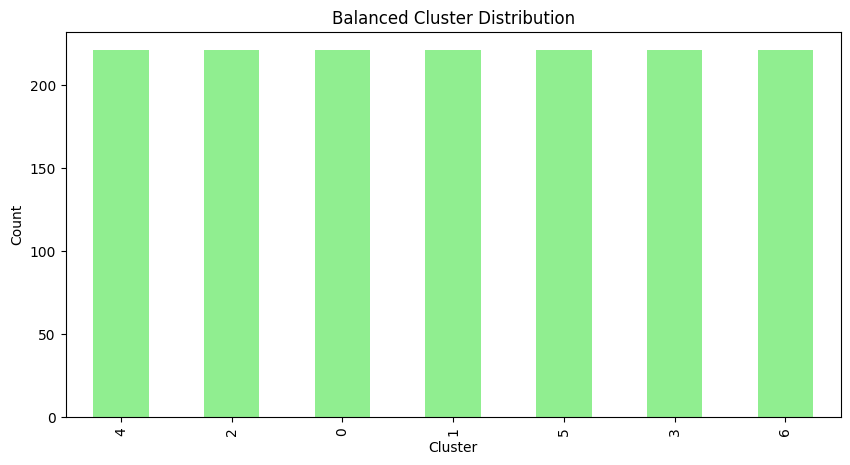

In [38]:
# Plot the original cluster distribution
plt.figure(figsize=(10, 5))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Original Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Plot the balanced cluster distribution
plt.figure(figsize=(10, 5))
balanced_cluster_counts.plot(kind='bar', color='lightgreen')
plt.title('Balanced Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [39]:
# Save the clustering results to a CSV file
pca_weather_data.to_csv('weather_data/clustering_results_final.csv', index=False)

In [42]:
pca_weather_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,lat,lon,District,kmeans_cluster,dbscan_cluster
0,-2.782097,-0.905778,0.620218,0.058691,0.142034,-0.208552,0.586851,22.834967,70.903505,MORBI,4,-1
1,-2.742301,-1.161379,-0.086230,0.543307,0.294373,0.025975,0.347459,22.756916,72.243635,AHMADABAD,4,0
2,-2.519069,-0.561634,0.284306,0.390276,0.148595,0.104006,0.429455,22.426788,72.750860,ANAND,4,-1
3,-1.868220,1.005078,2.423285,-0.318696,-0.374138,0.470605,0.724793,22.123915,69.460359,DEVBHUMI DWARKA,2,-1
4,-1.948175,0.759476,2.017044,-0.610842,-0.422942,0.491755,0.533511,22.284992,70.195152,JAMNAGAR,2,-1


In [44]:
# Load the shapefile
shapefile_path = 'shape_file_folder/DISTRICT_BOUNDARY.shp'
districts = gpd.read_file(shapefile_path)

# Inspect the columns of the districts GeoDataFrame
print(districts.columns)



Index(['District', 'STATE', 'REMARKS', 'State_LGD', 'DISTRICT_L', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')


# Overlaying Clusters information on geographical map

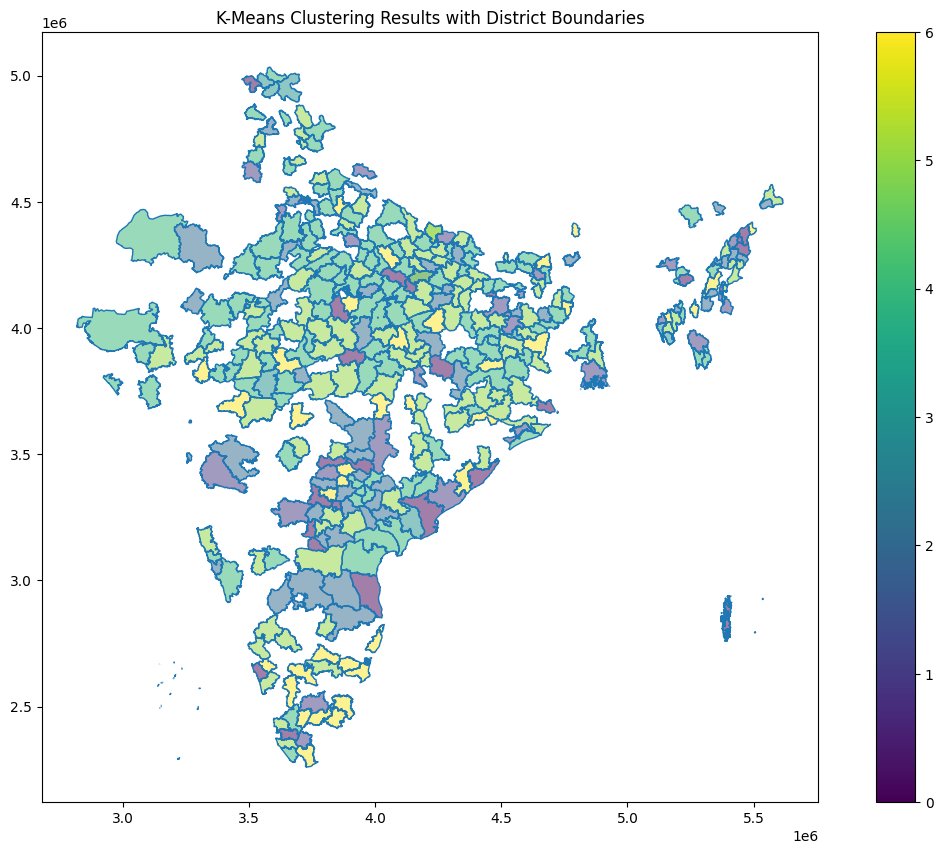

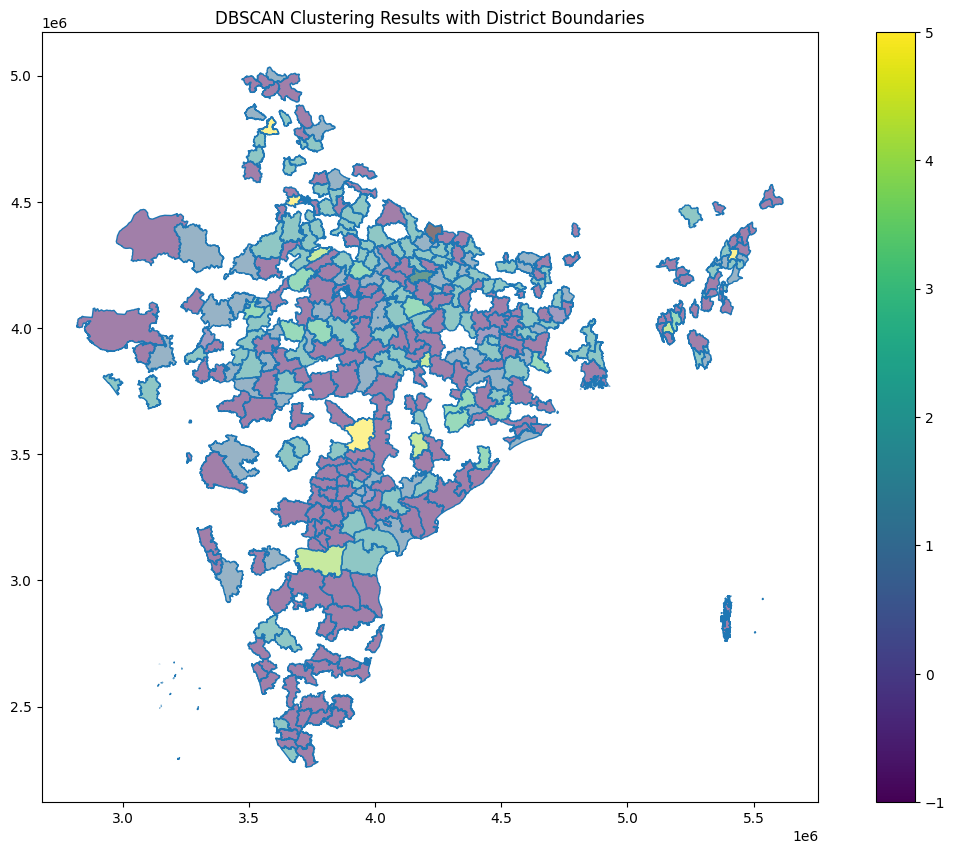

In [46]:
# Replace 'district_name_column' with the actual column name
# For example, if the column name is 'District_Name', use that
merged_data = districts.merge(pca_weather_data, on="District")

# Plot the district boundaries with K-Means clustering results
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.boundary.plot(ax=ax, linewidth=1)
merged_data.plot(column='kmeans_cluster', ax=ax, legend=True, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering Results with District Boundaries')
plt.show()

# Plot the district boundaries with DBSCAN clustering results
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.boundary.plot(ax=ax, linewidth=1)
merged_data.plot(column='dbscan_cluster', ax=ax, legend=True, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering Results with District Boundaries')
plt.show()